In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "E:\Downloads\modak-classifier"

CATEGORIES = ["modak-image", "non-modak-image"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')
        plt.show() 

        break 
    break 

In [3]:
print(img_array)

[[70 70 70 ... 31 28 28]
 [70 70 70 ... 31 28 28]
 [70 70 70 ... 31 28 28]
 ...
 [50 50 50 ... 57 72 72]
 [50 50 50 ... 60 70 70]
 [48 48 48 ... 63 59 59]]


In [4]:
print(img_array.shape)

(270, 186)


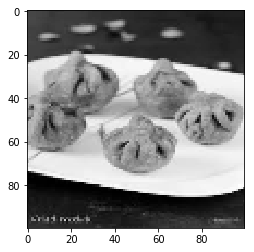

In [7]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
create_training_data()

print(len(training_data))

100%|██████████| 50/50 [00:00<00:00, 1293.51it/s]

100


In [17]:
import random

random.shuffle(training_data)

In [18]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
1
1
1
1
0


In [26]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

[[[[ 26]
   [ 27]
   [ 29]
   ...
   [ 35]
   [ 39]
   [ 38]]

  [[ 25]
   [ 27]
   [ 28]
   ...
   [ 40]
   [ 40]
   [ 40]]

  [[ 25]
   [ 26]
   [ 27]
   ...
   [ 47]
   [ 43]
   [ 49]]

  ...

  [[ 54]
   [ 54]
   [ 56]
   ...
   [179]
   [164]
   [150]]

  [[ 46]
   [ 46]
   [ 48]
   ...
   [168]
   [156]
   [145]]

  [[ 34]
   [ 36]
   [ 38]
   ...
   [160]
   [151]
   [143]]]]


In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [32]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,batch_size=32, epochs=10, validation_split=0.3)

Train on 70 samples, validate on 30 samples
Epoch 1/10
70/70 [==============================] - 8s 107ms/sample - loss: 1890.8364 - accuracy: 0.4714 - val_loss: 225.3082 - val_accuracy: 0.4333
Epoch 2/10
70/70 [==============================] - 7s 106ms/sample - loss: 159.7972 - accuracy: 0.5286 - val_loss: 25.8832 - val_accuracy: 0.4333
Epoch 3/10
70/70 [==============================] - 8s 121ms/sample - loss: 9.4984 - accuracy: 0.5857 - val_loss: 0.9648 - val_accuracy: 0.7000
Epoch 4/10
70/70 [==============================] - 10s 146ms/sample - loss: 0.5927 - accuracy: 0.6286 - val_loss: 0.6690 - val_accuracy: 0.7333
Epoch 5/10
70/70 [==============================] - 8s 121ms/sample - loss: 0.4828 - accuracy: 0.7429 - val_loss: 0.8429 - val_accuracy: 0.6000
Epoch 6/10
70/70 [==============================] - 9s 124ms/sample - loss: 0.3512 - accuracy: 0.8571 - val_loss: 0.5821 - val_accuracy: 0.8333
Epoch 7/10
70/70 [==============================] - 11s 153ms/sample - loss: 0.3648